In [1]:
import datetime as dt
import pandas as pd
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]


In [2]:
# Thanks to hatyan https://github.com/Deltares/hatyan for the core of this example
url_prefix="http://uhslc.soest.hawaii.edu:80/opendap/rqds/global/hourly" 
station_urls=["h825a.nc","h822a.nc"]
station_names=["Cuxhaven","Brest"] #http://uhslc.soest.hawaii.edu/data/

In [98]:
ts_meas=[]
ts_names=[]
for i in np.arange(len(station_urls)):
   ts_data = nc.Dataset(url_prefix+"/"+station_urls[i])
   ts_name = station_names[i]
   ts_names.append(ts_name)
   print(nc.chartostring(ts_data['station_name'][:])[0]) #check name
   ts_values=ts_data["sea_level"][0,:]/1000
   ts_values=ts_values[-1000:]
   ts_times=ts_data_times = nc.num2date(ts_data['time'][:],units=ts_data['time'].units, only_use_cftime_datetimes=False)
   ts_times=ts_times[-1000:]
   ts_meas.append(pd.DataFrame({'values':ts_values},index=ts_times))

Cuxhaven
Brest


NameError: name 'ts_names' is not defined

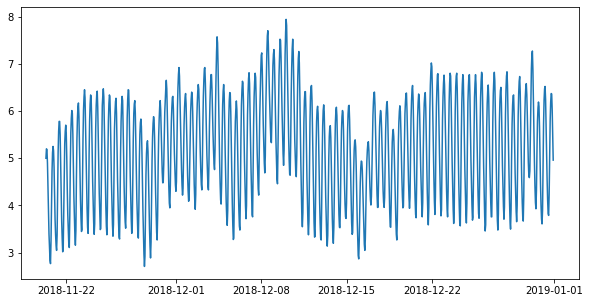

In [97]:
iplot=0
plt.plot(ts_meas[iplot])
plt.title(ts_names[iplot])

In [4]:
 ts_data = nc.Dataset(url_prefix+"/"+station_urls[0])
 ts_values=ts_data["sea_level"][0,-1000:]/1000
 ts_values

masked_array(data=[5.0, 5.2, 5.18, 4.9, 4.41, 3.86, 3.4, 3.09, 2.84, 2.77,
                   3.25, 4.05, 4.73, 5.12, 5.25, 5.157, 4.81, 4.2, 3.7,
                   3.38, 3.15, 3.05, 3.38, 4.34, 5.13, 5.57, 5.78, 5.78,
                   5.5, 4.88, 4.23, 3.67, 3.3, 3.02, 3.07, 3.86, 4.79,
                   5.31, 5.57, 5.701, 5.54, 5.02, 4.34, 3.81, 3.46, 3.18,
                   3.11, 3.79, 4.86, 5.54, 5.85, 6.01, 5.95, 5.51, 4.82,
                   4.2, 3.74, 3.37, 3.16, 3.47, 4.55, 5.38, 5.84, 6.092,
                   6.17, 5.89, 5.27, 4.63, 4.13, 3.74, 3.45, 3.49, 4.4,
                   5.43, 6.02, 6.3, 6.45, 6.28, 5.69, 4.98, 4.4, 3.93,
                   3.54, 3.41, 3.99, 5.09, 5.78, 6.148, 6.34, 6.3, 5.83,
                   5.12, 4.51, 4.06, 3.64, 3.39, 3.61, 4.71, 5.63, 6.12,
                   6.35, 6.42, 6.09, 5.44, 4.77, 4.25, 3.83, 3.49, 3.51,
                   4.42, 5.44, 6.119, 6.33, 6.47, 6.3, 5.7, 4.98, 4.42,
                   3.96, 3.56, 3.38, 3.93, 5.05, 5.79, 

In [8]:
import pandas as pd
from netCDF4 import Dataset, num2date
#import hatyan
#hatyan.close('all')#reading and editing time series, results in a pandas DataFrame a 'values' column (water level in meters) and a pd.DatetimeIndex as index (timestamps as datetime.datetime)
url_prefix = 'http://uhslc.soest.hawaii.edu:80/opendap/rqds/global/hourly/' #Cuxhaven dataset from UHSLC database #os.path.join(r'n:\\Deltabox\\Bulletin\\veenstra\\VLISSGN_waterlevel_20101201_20140101.noos')
station_urls = ['h825a.nc','h822a.nc']
iS = 1
ts_data = Dataset(f'{url_prefix}{station_urls[iS]}')
ts_data_values = ts_data['sea_level'][0,-100:]/1000-5 #correct from mm to meters and for 5m offset
ts_data_times = num2date(ts_data['time'][-100:],units=ts_data['time'].units, only_use_cftime_datetimes=False)
ts_meas = pd.DataFrame({'values':ts_data_values},index=ts_data_times)
#ts_meas = hatyan.plot_timeseries(ts=ts_meas)

RuntimeError: NetCDF: Access failure